# 导入第三方库

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from random import *
from math import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# import tensorflow as tf
import matplotlib as mpl
import seaborn as sns

# 数据输入和准备

In [7]:
otu_label = pd.read_csv("genus0427.csv",header=0,index_col=0)
otu = otu_label.drop("label",axis=1)
label = otu_label["label"]
label[label=="NM"] = "HI"
label[label=="CR"] = "CRC"

<ipython-input-7-82a21f5963d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="NM"] = "HI"
<ipython-input-7-82a21f5963d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="CR"] = "CRC"


# 训练集和测试集划分

In [8]:
##---------训练集和测试集划分---------未考虑测序批次
X=otu_label.drop(['label'], axis=1)# Features
y=otu_label['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2050,shuffle=True)
X_train

,Arthrobacter,Blastomonas,Catenibacterium,Peptostreptococcaceae_incertae_sedis,Ruminobacter,Roseburia,Alistipes,Butyricimonas,Lactonifactor,Desulfitobacterium,...,Peptococcus,Pediococcus,Succinatimonas,Murimonas,Fibrobacter,Actinomyces,Campylobacter,Thalassobaculum,Sulfurimonas,Prevotella
Sample,,,,,,,,,,,,,,,,,,,,,
CRI07,0.000000,0.00000,0.000000,0.0,0.0,8.481831,1.253897,0.227981,0.004653,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.970409
JK091,0.000000,0.00000,0.000000,0.0,0.0,4.098845,2.316494,0.112451,0.002811,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.005623,0.000000,0.0,0.0,7.418965
FJ066,0.000000,0.00000,0.000000,0.0,0.0,4.501541,0.289600,0.013901,0.006950,0.0,...,0.000000,0.0,0.002317,0.0,0.0,0.000000,0.000000,0.0,0.0,5.650673
CR032,0.002164,0.00000,0.004328,0.0,0.0,0.688133,0.458755,0.064918,0.004328,0.0,...,0.002164,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,9.636025
JZ069,0.000000,0.00000,0.011140,0.0,0.0,1.593031,0.385447,0.060156,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.004456,0.002228,0.0,0.0,14.355101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JZ067,0.000000,0.00000,0.018668,0.0,0.0,4.305215,0.961381,0.128340,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.002333,0.000000,0.0,0.0,29.861160
XRJ02,0.000000,0.00000,0.018964,0.0,0.0,5.229223,0.504907,0.009482,0.002370,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.009482,0.004741,0.0,0.0,26.086853
FJ043,0.000000,0.00000,0.004291,0.0,0.0,2.289012,0.218818,0.012872,0.006436,0.0,...,0.002145,0.0,0.002145,0.0,0.0,0.002145,0.000000,0.0,0.0,51.164886


## 模型构建及参数调优 

模型一：随机森林

In [9]:
param = {
    'n_estimators':range(10,50,10),
    'max_features':range(1,10,1)
}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=2050),
                        param_grid = param,
                        cv=5,n_jobs=-1)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2050),
             n_jobs=-1,
             param_grid={'max_features': range(1, 10),
                         'n_estimators': range(10, 50, 10)})

In [10]:
best_estimator = gsearch1.best_estimator_
#best_estimator = RandomForestClassifier(max_features=8, n_estimators=750, random_state=2050)
print(f'best params:{gsearch1.best_params_}')
print('best accuracy:%f' % gsearch1.best_score_)
print(best_estimator)

best params:{'max_features': 7, 'n_estimators': 40}
best accuracy:0.717563
RandomForestClassifier(max_features=7, n_estimators=40, random_state=2050)


In [11]:
#对训练集进行交叉验证
scores = cross_val_score(best_estimator, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.72 (+/- 0.07)


In [12]:
scores

array([0.67164179, 0.70895522, 0.74626866, 0.69402985, 0.76691729])

In [13]:
#对测试集进行测试
best_estimator.fit(X_train,y_train)
#y_pred=best_estimator.predict_proba(X_test)
y_pred=best_estimator.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


In [14]:
y_train.value_counts()

NAA    145
PL     136
CRC    133
HI     133
AA     122
Name: label, dtype: int64

In [15]:
y_test.value_counts()

AA     68
CRC    62
HI     59
PL     55
NAA    44
Name: label, dtype: int64

In [16]:
y_test_pred=best_estimator.predict_proba(X_test)

In [23]:
# nn = pd.DataFrame(pd.concat([pd.DataFrame(y_test_pred,columns=['CR','FJ','JK','JZ','XR']),
#                              pd.DataFrame(y_test.values,columns=['True_label']),
#                             pd.DataFrame(y_test._stat_axis.values.tolist(),columns=['Sample']),
#                             pd.DataFrame(y_pred,columns=['Pred_label'])
#                             ],axis=1))
# nn.head()
# nn.to_csv('y_test_pred.csv',index=0)

In [17]:
alldata = pd.DataFrame(pd.concat([pd.DataFrame(y_test._stat_axis.values.tolist(),columns=['Sample']),
                             pd.DataFrame(y_test.values,columns=['True_label']),
                             pd.DataFrame(y_pred,columns=['Pred_label']),
                             pd.DataFrame(np.array(X_test),columns=X_test.columns)
                            ],axis=1))

In [25]:
# alldata.to_csv('alldata.csv',index=0)

In [26]:
# predict_probs = best_estimator.predict_proba(X)
# all_probs = pd.concat([pd.DataFrame(X.index),pd.DataFrame(predict_probs,columns=['JK','JZ','CR'])],axis=1)
# all_probs[:10].to_csv('all_probs_text.csv',index=0)

In [18]:
importance = best_estimator.feature_importances_
feature_imp = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)
feature_imp

Porphyromonas         0.028806
Parvimonas            0.018336
Peptostreptococcus    0.017990
Odoribacter           0.016898
Gemella               0.016700
                        ...   
Alkanindiges          0.000000
Alcanivorax           0.000000
Sphaerochaeta         0.000000
Shimia                0.000000
Aureitalea            0.000000
Length: 315, dtype: float64

In [19]:
filter_feature = feature_imp[feature_imp.values>0.002] 
filter_feature.index
filter_feature.head()
# filter_feature = feature_imp
# filter_feature.to_csv('filter_feature.csv',index=1)
filter_feature.head()

Porphyromonas         0.028806
Parvimonas            0.018336
Peptostreptococcus    0.017990
Odoribacter           0.016898
Gemella               0.016700
dtype: float64

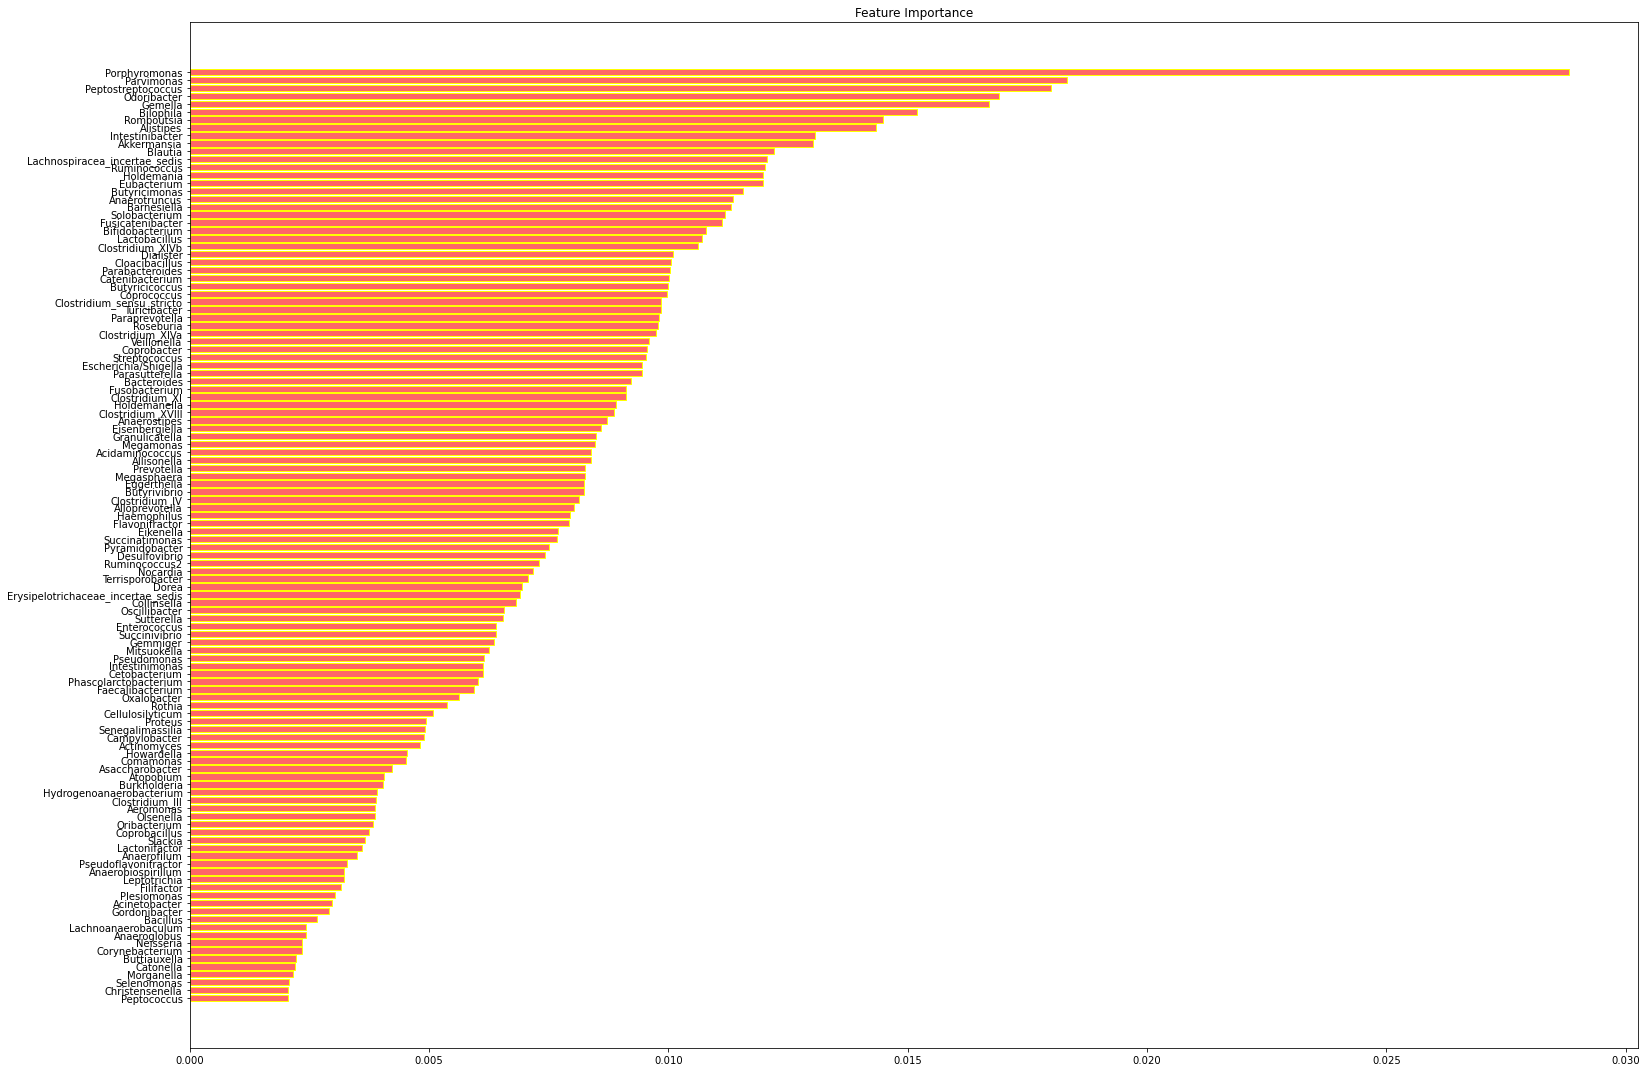

In [20]:
# plot feature importance
indices = np.argsort(filter_feature)
selectn = filter_feature.shape[0]
fig=plt.figure(figsize=(23,15))
ax=fig.add_subplot(111)

ax.barh(range(selectn),filter_feature[indices],facecolor='#FF6666', edgecolor='#FFFF00')
ax.set_yticks(range(selectn))
ax.set_yticklabels(indices[::-1].index)
#ax.set_xlim(0, np.max(indices,)*1.1)
ax.set_title('Feature Importance')
plt.tight_layout()
plt.show()

模型二: 逻辑回归、决策树、KNN、朴素贝叶斯、支持向量机

In [21]:
from sklearn.model_selection import cross_val_score   # 10折交叉验证评价模型
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline   # 管道简化工作流
from sklearn.preprocessing import StandardScaler  # 标准化数据
from sklearn.preprocessing import LabelEncoder   # 标签化分类变量
from sklearn.naive_bayes import GaussianNB
import sklearn.svm as svm

clf1 = LogisticRegression(penalty='l2',C=0.001)
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()
clf4 = GaussianNB()
clf5 = svm.SVC(kernel='poly', degree=3)


clf_labels = ['Logistic regression','Decision tree','KNN',"Naive Bayes","svm"]
print('5-folds cross validation :\n')
for clf,label in zip([clf1,clf2,clf3,clf4,clf5],clf_labels):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(scores)
    print("ACCURACY: %0.2f(+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

5-folds cross validation :



E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[0.41044776 0.3358209  0.3880597  0.40298507 0.37593985]
ACCURACY: 0.38(+/- 0.03)[Logistic regression]
Accuracy: 0.3923611111111111
[0.54477612 0.56716418 0.55223881 0.49253731 0.51879699]
ACCURACY: 0.54(+/- 0.03)[Decision tree]
Accuracy: 0.5138888888888888
[0.3358209  0.29850746 0.3358209  0.40298507 0.28571429]
ACCURACY: 0.33(+/- 0.04)[KNN]
Accuracy: 0.3263888888888889
[0.45522388 0.5        0.53731343 0.53731343 0.39097744]
ACCURACY: 0.48(+/- 0.06)[Naive Bayes]
Accuracy: 0.5
[0.40298507 0.3358209  0.3880597  0.38059701 0.35338346]
ACCURACY: 0.37(+/- 0.02)[svm]
Accuracy: 0.3541666666666667


# 集成模型

MajorityVoteClassifier集成

In [22]:
## 我们使用MajorityVoteClassifier集成：
from sklearn.ensemble import VotingClassifier
mv_clf = VotingClassifier(estimators=[('clf1',clf1),('clf2',clf2),('clf3',clf3)],voting='soft')
clf_labels = ['Logistic regression','Decision tree','KNN','MajorityVoteClassifier']
all_clf = [clf1,clf2,clf3,mv_clf]
print('5-folds cross validation :\n')
for clf,label in zip(all_clf,clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=5)
    print("ACCURACY: %0.2f(+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
## 对比下面结果，可以得知多数投票方式的分类算法，抗差能力更强。

5-folds cross validation :



E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

ACCURACY: 0.38(+/- 0.03)[Logistic regression]
Accuracy: 0.3923611111111111
ACCURACY: 0.55(+/- 0.04)[Decision tree]
Accuracy: 0.5104166666666666
ACCURACY: 0.33(+/- 0.04)[KNN]
Accuracy: 0.3263888888888889


E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

ACCURACY: 0.53(+/- 0.02)[MajorityVoteClassifier]
Accuracy: 0.5520833333333334


E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

bagging思想的套袋集成技术

In [23]:
# 基于bagging思想的套袋集成技术
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)   #选择决策树为基本分类器
bag = BaggingClassifier(base_estimator=tree,n_estimators=10,max_samples=.5,max_features=1.0,bootstrap=True,
                        bootstrap_features=False,n_jobs=1,random_state=1)
from sklearn.metrics import accuracy_score
bag = bag.fit(X_train,y_train)
# y_train_pred = bag.predict(X_train)
# y_test_pred = bag.predict(X_test)
# bag_train = accuracy_score(y_train,y_train_pred)
# bag_test = accuracy_score(y_test,y_test_pred)
# print('Bagging train/test accuracies %.3f/%.3f' % (bag_train,bag_test))
scores = cross_val_score(estimator=bag,X=X_train,y=y_train,cv=5)
print("ACCURACY: %0.2f(+/- %0.2f)[%s]"%(scores.mean(),scores.std(),"bag"))
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ACCURACY: 0.60(+/- 0.04)[bag]
Accuracy: 0.6006944444444444


Adaboost集成建模

In [24]:
# 基于boosting思想的自适应增强方法----Adaboost集成建模
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=2,learning_rate=0.01,random_state=1)
# ada = ada.fit(X_train,y_train)
# y_train_pred = ada.predict(X_train)
# y_test_pred = ada.predict(X_test)
# ada_train = accuracy_score(y_train,y_train_pred)
# ada_test = accuracy_score(y_test,y_test_pred)
# print('Adaboost train/test accuracies %.3f/%.3f' % (ada_train,ada_test))
clf = ada
scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=5)
print("ACCURACY: %0.2f(+/- %0.2f)[%s]"%(scores.mean(),scores.std(),"ada"))
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ACCURACY: 0.52(+/- 0.03)[ada]
Accuracy: 0.5590277777777778


StackingCVRegressor

In [151]:
y_train[y_train=="NM"] = "1"
y_train[y_train=="PL"] = "2"
y_train[y_train=="NAA"] = "3"
y_train[y_train=="AA"] = "4"
y_train[y_train=="CR"] = "5"

In [152]:
y_test[y_test=="NM"] = "1"
y_test[y_test=="PL"] = "2"
y_test[y_test=="NAA"] = "3"
y_test[y_test=="AA"] = "4"
y_test[y_test=="CR"] = "5"

In [131]:
## 1. 简单堆叠5折CV分类
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier

RANDOM_SEED = 2050

clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(max_features=7, n_estimators=40, random_state=2050)
clf3 = GaussianNB()
lr = LogisticRegression()

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],  # 第一层分类器
                            meta_classifier=lr,   # 第二层分类器
                            random_state=RANDOM_SEED)

print('5-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest', 'Naive Bayes','StackingClassifier']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

5-fold cross validation:

Accuracy: 0.39 (+/- 0.02) [KNN]
Accuracy: 0.3400673400673401
Accuracy: 0.84 (+/- 0.02) [Random Forest]
Accuracy: 0.8249158249158249
Accuracy: 0.53 (+/- 0.04) [Naive Bayes]
Accuracy: 0.5117845117845118


E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy: 0.76 (+/- 0.01) [StackingClassifier]
Accuracy: 0.7474747474747475


E:\anaconda3\envs\tensorflow20\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Xgboost训练模型

In [183]:
## Xgboost训练模型
from xgboost import XGBClassifier
clf = XGBClassifier(learning_rate =0.1,
 n_estimators=10,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#对测试集测试
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

E:\anaconda3\envs\tensorflow20\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\envs\tensorflow20\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\envs\tensorflow20\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\envs\tensorflow20\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\envs\tensorflow20\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.82608696 0.84057971 0.82608696 0.88405797 0.80434783]
Accuracy: 0.84 (+/- 0.05)
[17:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are onl

E:\anaconda3\envs\tensorflow20\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.8181818181818182
